In [73]:
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
xs = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], dtype=float)
ys = np.array([1.0, 1.5, 2.0, 2.5, 3.0, 3.5], dtype=float)

In [19]:
model = tf.keras.Sequential()
model.add(keras.layers.Dense(units = 1, input_shape  = [1]))
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(xs, ys, epochs=100)


2021-11-17 19:26:21.596572: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-11-17 19:26:21.679890: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2499950000 Hz


Epoch 1/100


2021-11-17 19:26:22.179352: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10


1/1 [==============================] - 3s 3s/step - loss: 3.8126
Epoch 2/100
1/1 [==============================] - 0s 3ms/step - loss: 1.7800
Epoch 3/100
1/1 [==============================] - 0s 2ms/step - loss: 0.8392
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 0.4036
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.2019
Epoch 6/100
1/1 [==============================] - 0s 2ms/step - loss: 0.1085
Epoch 7/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0651
Epoch 8/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0449
Epoch 9/100
1/1 [==============================] - 0s 1ms/step - loss: 0.0355
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0310
Epoch 11/100
1/1 [==============================] - 0s 2ms/step - loss: 0.0288
Epoch 12/100
1/1 [==============================] - 0s 3ms/step - loss: 0.0277
Epoch 13/100
1/1 [==============================] - 0s 3ms/step - loss: 0.

In [24]:
model.predict([6.0])

array([[3.608444]], dtype=float32)

# MNIST Dataset

In [32]:
source = tf.keras.datasets.mnist
data = source.load_data()

In [54]:

data = np.array(data)
# print(data)
print(type(data))
print(data.shape)
print(len(data[0][1]))
(x_train, y_train), (x_test, y_test) = data



<class 'numpy.ndarray'>
(2, 2)
60000


In [71]:
print(data[0][0][0].shape)
print((data[0][1][0]))

(28, 28)
5


In [104]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99:
            print("\n Reached 99% acccuracy so cancelling training")
            self.model.stop_training = True
    

In [106]:
model = tf.keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(512, activation=tf.nn.leaky_relu))
model.add(keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy', 
             metrics=['accuracy'])

callbacks = myCallback()
model.fit(x_train, y_train, epochs=100, callbacks=[callbacks])


Epoch 1/100
1875/1875 [==============================] - 1s 701us/step - loss: 11.9757 - accuracy: 0.8533
Epoch 2/100
1875/1875 [==============================] - 1s 703us/step - loss: 3.3315 - accuracy: 0.9314
Epoch 3/100
1875/1875 [==============================] - 1s 707us/step - loss: 2.6840 - accuracy: 0.9415
Epoch 4/100
1875/1875 [==============================] - 1s 722us/step - loss: 2.4464 - accuracy: 0.9496
Epoch 5/100
1875/1875 [==============================] - 1s 702us/step - loss: 2.3095 - accuracy: 0.9553
Epoch 6/100
1875/1875 [==============================] - 1s 710us/step - loss: 2.1205 - accuracy: 0.9610
Epoch 7/100
1875/1875 [==============================] - 1s 709us/step - loss: 2.0829 - accuracy: 0.9660
Epoch 8/100
1875/1875 [==============================] - 1s 741us/step - loss: 2.0750 - accuracy: 0.9693
Epoch 9/100
1875/1875 [==============================] - 1s 709us/step - loss: 2.1825 - accuracy: 0.9690
Epoch 10/100
1875/1875 [==============================

In [ ]:
tf.nn.l

2


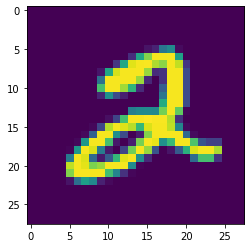

In [82]:
i = 5
plt.imshow(data[0][0][i])
print(data[0][1][i])